# Data Mining - Lab 2

**Huỳnh Thị Thắm - 18110209**

In [1]:
path = "G:\\University_Learning\\data-mining\\Lab02\\"
import os
os.chdir(path)
currentWorkingDir = %pwd
currentWorkingDir

'G:\\University_Learning\\data-mining\\Lab02'

In [2]:
# Read data and look statistics
import pandas as pd
data = pd.read_csv("Dataset\\Titanic.csv")

print("Display all first of 5 rows :")
display(data.head())
print("The shape of data in (nrows,ncols)")
print(data.shape)

Display all first of 5 rows :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The shape of data in (nrows,ncols)
(891, 12)


In [3]:
# Library 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('max.columns',100)
pd.set_option('max.rows',500)

In [4]:
def find_missing_percent(data , showresult = True):
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        missinginfo = {"ColumnName" : col, "TotalMissingVals" : sum_miss_val, "PercentMissing" : percent_miss_val}
        miss_df = miss_df.append(missinginfo, ignore_index = True)
    
    miss_df = miss_df[miss_df["PercentMissing"] > 0.0]
    miss_df = miss_df.reset_index(drop = True)
    miss_features = miss_df["ColumnName"].values
    if(showresult):
        print(data.shape)
        display(data.head())
        display(miss_df)
    return miss_df

In [5]:
miss_df = find_missing_percent(data)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,ColumnName,TotalMissingVals,PercentMissing
0,Age,177.0,19.87
1,Cabin,687.0,77.10
2,Embarked,2.0,0.22


In [6]:
drop_cols = list(miss_df[miss_df['PercentMissing'] > 60.0].ColumnName)
print(drop_cols)
data = data.drop(drop_cols,axis=1)
miss_df = find_missing_percent(data)

['Cabin']
(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


,ColumnName,TotalMissingVals,PercentMissing
0,Age,177.0,19.87
1,Embarked,2.0,0.22


## Missing Handling

### Listwise Deletion

In [7]:
def listwise_deletion(data):
    for col in data.columns:
        miss_ind = data[col][data[col].isnull()].index
        data = data.drop(miss_ind, axis = 0)
    return data

data_lwd = listwise_deletion(data)
miss_df = find_missing_percent(data_lwd)

(712, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


,ColumnName,TotalMissingVals,PercentMissing


### Mean/Mode

In [8]:
numeric_cols = data.select_dtypes(['float','int']).columns
categoric_cols = data.select_dtypes('object').columns
print(f"Numeric Columns : {numeric_cols}")
print(f"Categoric Columns : {categoric_cols}")

Numeric Columns : Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categoric Columns : Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [9]:
def mean_imputation(data_numeric):
    for col in data_numeric.columns:
        mean = data_numeric[col].mean()
        data_numeric[col] = data_numeric[col].fillna(mean)
    return data_numeric
def mode_imputation(data_categoric):
    for col in data_categoric.columns:
        mode = data_categoric[col].mode().iloc[0]
        data_categoric[col] = data_categoric[col].fillna(mode)
    return data_categoric

In [10]:
data_numeric = data[numeric_cols]
data_numeric_mean_imp = mean_imputation(data_numeric)
data_categoric = data[categoric_cols]
data_categoric_mode_imp = mode_imputation(data_categoric)

data_imputed_value = pd.concat([data_numeric_mean_imp, data_categoric_mode_imp], axis = 1)
miss_df = find_missing_percent(data_imputed_value)

(891, 11)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,2,1,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,3,1,3,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,4,1,1,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,5,0,3,35.0,0,0,8.0500,"Allen, Mr. William Henry",male,373450,S


,ColumnName,TotalMissingVals,PercentMissing


### XGBoosting

In [11]:
!pip install xgboost

In [12]:
import xgboost
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)

In [13]:
def find_missing_index(data_numeric_xgboost, target_cols):
    miss_index_dict = {}
    for tcol in target_cols:
        index = data_numeric_xgboost[tcol][data_numeric_xgboost[tcol].isnull()].index
        miss_index_dict[tcol] = index
    return miss_index_dict

def xgboost_imputation(data_numeric_xgboost, target_cols, miss_index_dict):
    predictors = data_numeric_xgboost.drop(target_cols, axis =1)
    for tcol in target_cols:
        y = data_numeric_xgboost[tcol]
        y = y.fillna(y.mean())
        xgb = xgboost.XGBRegressor(objective="reg:squarederror", random_state=42)
        xgb.fit(predictors, y)
        predictions = pd.Series(xgb.predict(predictors),index= y.index)    
        index = miss_index_dict[tcol]
        data_numeric_xgboost[tcol].loc[index] = predictions.loc[index]
    return data_numeric_xgboost

In [14]:
miss_df = find_missing_percent(data, showresult = False)
miss_features = miss_df["ColumnName"].values
target_cols = [feature for feature in miss_features if feature in numeric_cols]  
print(target_cols)

data_numeric_xgboost = data[numeric_cols]
miss_index_dict = find_missing_index(data_numeric_xgboost, target_cols)
data_numeric_xgboost = xgboost_imputation(data_numeric_xgboost, target_cols, miss_index_dict)
data_imputed_xgboost = pd.concat([data_numeric_xgboost, data_categoric_mode_imp], axis = 1)

miss_df = find_missing_percent(data_imputed_xgboost)

['Age']
(891, 11)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,2,1,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,3,1,3,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,4,1,1,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,5,0,3,35.0,0,0,8.0500,"Allen, Mr. William Henry",male,373450,S


,ColumnName,TotalMissingVals,PercentMissing


### MICE

In [15]:
def mice_imputation_numeric(train_numeric):
    iter_imp_numeric = IterativeImputer(GradientBoostingRegressor())
    imputed_train = iter_imp_numeric.fit_transform(train_numeric)
    train_numeric_imp = pd.DataFrame(imputed_train, columns = train_numeric.columns, index= train_numeric.index)
    return train_numeric_imp

def mice_imputation_categoric(train_categoric):
    ordinal_dict={}
    for col in train_categoric:
        ordinal_dict[col] = OrdinalEncoder()
        nn_vals = np.array(train_categoric[col][train_categoric[col].notnull()]).reshape(-1,1)
        nn_vals_arr = np.array(ordinal_dict[col].fit_transform(nn_vals)).reshape(-1,)
        train_categoric[col].loc[train_categoric[col].notnull()] = nn_vals_arr

    iter_imp_categoric = IterativeImputer(GradientBoostingClassifier(), max_iter =5, initial_strategy='most_frequent')
    imputed_train = iter_imp_categoric.fit_transform(train_categoric)
    train_categoric_imp = pd.DataFrame(imputed_train, columns =train_categoric.columns,index = train_categoric.index).astype(int)
    
    for col in train_categoric_imp.columns:
        oe = ordinal_dict[col]
        train_arr= np.array(train_categoric_imp[col]).reshape(-1,1)
        train_categoric_imp[col] = oe.inverse_transform(train_arr)
        
    return train_categoric_imp

In [16]:
data_numeric_imp  = mice_imputation_numeric(data_numeric)
data_categoric_imp = mice_imputation_categoric(data_categoric)

data_imputed_mice = pd.concat([data_numeric_imp, data_categoric_imp], axis = 1)
miss_df = find_missing_percent(data_imputed_mice)

(891, 11)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,"Allen, Mr. William Henry",male,373450,S


,ColumnName,TotalMissingVals,PercentMissing


## Data Modelling

### Listwise Deletion

In [17]:
data_modelling = data_lwd.copy()

skew_limit = 0.5
skew_vals = data_modelling[numeric_cols].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))
display(skew_cols.T)

,Fare,Parch,SibSp
Skew,4.667009,2.614177,2.515107


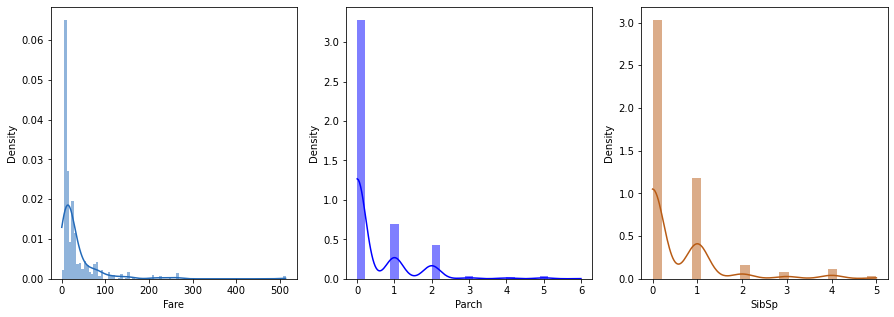

In [18]:
fig, (ax_positive, ax_target, ax_negative) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data_modelling['Fare'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(data_modelling['Parch'],kde=True, stat='density', linewidth=0, color = 'blue', ax=ax_target)
sns.histplot(data_modelling['SibSp'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)
plt.show()

In [19]:
def NormalizeSkewedFeatures(data_modelling):
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    for col in skew_cols.index:
        if(col != 'SalePrice'):
            try:
                data_modelling[col] = boxcox1p(data_modelling[col], boxcox_normmax(data_modelling[col] + 1))
            except:
                print(f"column {col} can not apply BoxCox")
                continue
    return data_modelling

data_modelling = NormalizeSkewedFeatures(data_modelling)

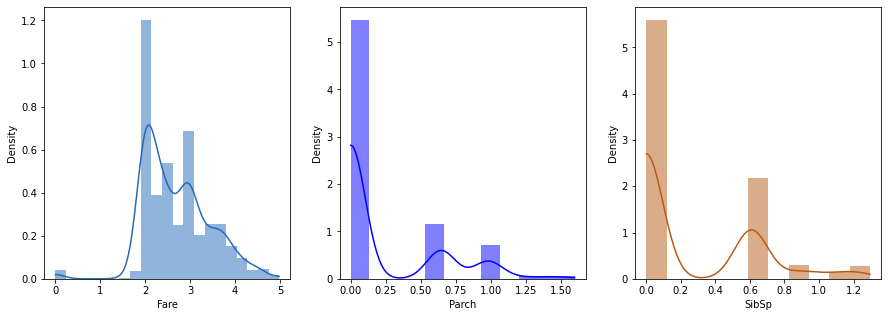

In [20]:
fig, (ax_positive, ax_target, ax_negative) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data_modelling['Fare'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(data_modelling['Parch'],kde=True, stat='density', linewidth=0, color = 'blue', ax=ax_target)
sns.histplot(data_modelling['SibSp'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)
plt.show()

In [21]:
def FeatureEncoding(data_modelling):
    data_modelling = pd.get_dummies(data_modelling, columns=categoric_cols, drop_first=True)   
    return data_modelling

data_modelling = FeatureEncoding(data_modelling)
display(data_modelling.head())
print(data_modelling.shape)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)","Name_Andreasson, Mr. Paul Edvin","Name_Andrew, Mr. Edgardo Samuel","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Arnold-Franchi, Mr. Josef","Name_Arnold-Franchi, Mrs. Josef (Josefine Franchi)","Name_Artagaveytia, Mr. Ramon","Name_Asim, Mr. Adola","Name_Asplund, Master. Clarence Gustaf Hugo","Name_Asplund, Master. Edvin Rojj Felix","Name_Asplund, Miss. Lillian Gertrud",...,Ticket_S.W./PP 752,Ticket_SC 1748,Ticket_SC/AH 29037,Ticket_SC/AH 3085,Ticket_SC/AH Basle 541,Ticket_SC/PARIS 2133,Ticket_SC/PARIS 2149,Ticket_SC/PARIS 2167,Ticket_SC/Paris 2123,Ticket_SC/Paris 2163,Ticket_SCO/W 1585,Ticket_SO/C 14885,Ticket_SOTON/O.Q. 3101306,Ticket_SOTON/O.Q. 3101307,Ticket_SOTON/O.Q. 3101310,Ticket_SOTON/O.Q. 3101311,Ticket_SOTON/O.Q. 3101312,Ticket_SOTON/O.Q. 392078,Ticket_SOTON/O2 3101272,Ticket_SOTON/O2 3101287,Ticket_SOTON/OQ 3101317,Ticket_SOTON/OQ 392076,Ticket_SOTON/OQ 392089,Ticket_SOTON/OQ 392090,Ticket_STON/O 2. 3101269,Ticket_STON/O 2. 3101273,Ticket_STON/O 2. 3101274,Ticket_STON/O 2. 3101275,Ticket_STON/O 2. 3101280,Ticket_STON/O 2. 3101285,Ticket_STON/O 2. 3101286,Ticket_STON/O 2. 3101288,Ticket_STON/O 2. 3101289,Ticket_STON/O 2. 3101292,Ticket_STON/O 2. 3101293,Ticket_STON/O 2. 3101294,Ticket_STON/O2. 3101271,Ticket_STON/O2. 3101279,Ticket_STON/O2. 3101282,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,1,0,3,22.0,0.608512,0.0,1.951200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,0.608512,0.0,3.659614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0.000000,0.0,2.018098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,0.608512,0.0,3.447342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0.000000,0.0,2.029888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


(712, 1261)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def DataSplitTrainTest(data_modelling):
    train = data_modelling.copy()
    X = train.drop('Survived', axis=1)
    y = train['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
    print("Train Data", X_train.shape)
    print("Test Data", X_test.shape)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = DataSplitTrainTest(data_modelling)

Train Data (498, 1260)
Test Data (214, 1260)


In [23]:
def random_forest(X_train,X_test,y_train,y_test):
    '''
      Purpose: Perform Random Forest Classifier
      Input: X_train,y_train,X_test,y_test - DataFrame
      Output: The accuracy score of Random Forest
    '''
    rdf=RandomForestClassifier(random_state=0)
    rdf.fit(X_train,y_train)
    y_pred=rdf.predict(X_test)
    return metrics.accuracy_score(y_test,y_pred)

acc_lwd = random_forest(X_train, X_test, y_train, y_test)
acc_lwd

0.8598130841121495

### Mean/Mode Imputation

In [24]:
data_modelling = data_imputed_value.copy()

skew_limit = 0.5
skew_vals = data_modelling[numeric_cols].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))
display(skew_cols.T)

,Fare,SibSp,Parch,Pclass
Skew,4.787317,3.695352,2.749117,-0.630548


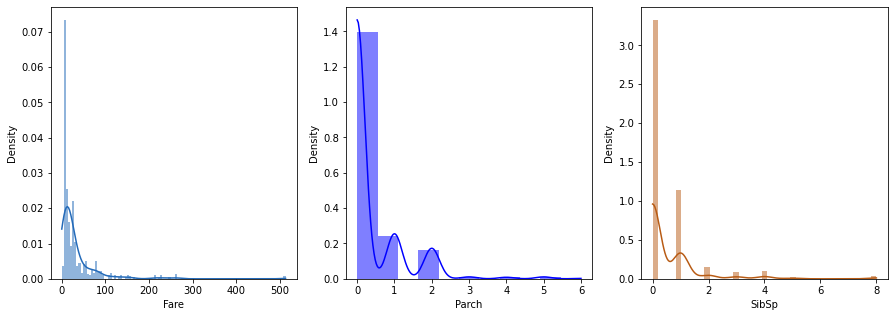

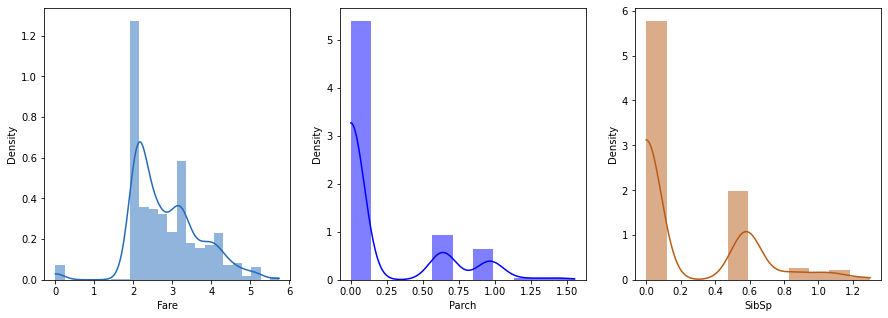

In [25]:
fig, (ax_positive, ax_target, ax_negative) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data_modelling['Fare'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(data_modelling['Parch'],kde=True, stat='density', linewidth=0, color = 'blue', ax=ax_target)
sns.histplot(data_modelling['SibSp'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)
plt.show()

data_modelling = NormalizeSkewedFeatures(data_modelling)

fig, (ax_positive, ax_target, ax_negative) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data_modelling['Fare'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(data_modelling['Parch'],kde=True, stat='density', linewidth=0, color = 'blue', ax=ax_target)
sns.histplot(data_modelling['SibSp'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)
plt.show()

In [26]:
data_modelling = FeatureEncoding(data_modelling)
display(data_modelling.head())
print(data_modelling.shape)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)","Name_Andreasson, Mr. Paul Edvin","Name_Andrew, Mr. Edgardo Samuel","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Arnold-Franchi, Mr. Josef","Name_Arnold-Franchi, Mrs. Josef (Josefine Franchi)","Name_Artagaveytia, Mr. Ramon","Name_Asim, Mr. Adola","Name_Asplund, Master. Clarence Gustaf Hugo","Name_Asplund, Master. Edvin Rojj Felix","Name_Asplund, Miss. Lillian Gertrud",...,Ticket_SC/PARIS 2167,Ticket_SC/Paris 2123,Ticket_SC/Paris 2163,Ticket_SCO/W 1585,Ticket_SO/C 14885,Ticket_SOTON/O.Q. 3101305,Ticket_SOTON/O.Q. 3101306,Ticket_SOTON/O.Q. 3101307,Ticket_SOTON/O.Q. 3101310,Ticket_SOTON/O.Q. 3101311,Ticket_SOTON/O.Q. 3101312,Ticket_SOTON/O.Q. 392078,Ticket_SOTON/O.Q. 392087,Ticket_SOTON/O2 3101272,Ticket_SOTON/O2 3101287,Ticket_SOTON/OQ 3101316,Ticket_SOTON/OQ 3101317,Ticket_SOTON/OQ 392076,Ticket_SOTON/OQ 392082,Ticket_SOTON/OQ 392086,Ticket_SOTON/OQ 392089,Ticket_SOTON/OQ 392090,Ticket_STON/O 2. 3101269,Ticket_STON/O 2. 3101273,Ticket_STON/O 2. 3101274,Ticket_STON/O 2. 3101275,Ticket_STON/O 2. 3101280,Ticket_STON/O 2. 3101285,Ticket_STON/O 2. 3101286,Ticket_STON/O 2. 3101288,Ticket_STON/O 2. 3101289,Ticket_STON/O 2. 3101292,Ticket_STON/O 2. 3101293,Ticket_STON/O 2. 3101294,Ticket_STON/O2. 3101271,Ticket_STON/O2. 3101279,Ticket_STON/O2. 3101282,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,1,0,5.602496,22.0,0.580385,0.0,2.050402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,1.321015,38.0,0.580385,0.0,4.039238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,5.602496,26.0,0.000000,0.0,2.124550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,1.321015,35.0,0.580385,0.0,3.780503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,5.602496,35.0,0.000000,0.0,2.137647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

(891, 1580)


In [27]:
X_train, X_test, y_train, y_test = DataSplitTrainTest(data_modelling)

Train Data (623, 1579)
Test Data (268, 1579)


In [28]:
acc_mm = random_forest(X_train, X_test, y_train, y_test)
acc_mm

0.7798507462686567

### XGBoosting

In [29]:
data_modelling = data_imputed_xgboost.copy()

skew_limit = 0.5
skew_vals = data_modelling[numeric_cols].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))
display(skew_cols.T)

,Fare,SibSp,Parch,Pclass
Skew,4.787317,3.695352,2.749117,-0.630548


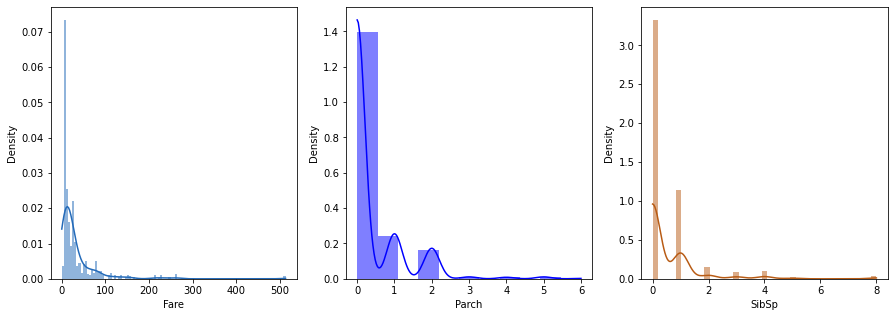

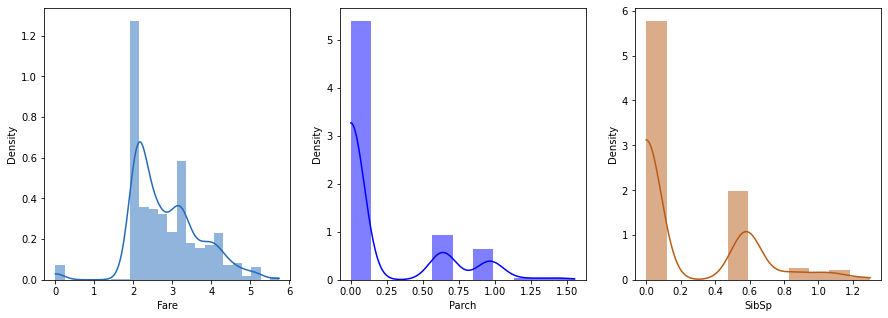

In [30]:
fig, (ax_positive, ax_target, ax_negative) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data_modelling['Fare'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(data_modelling['Parch'],kde=True, stat='density', linewidth=0, color = 'blue', ax=ax_target)
sns.histplot(data_modelling['SibSp'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)
plt.show()

data_modelling = NormalizeSkewedFeatures(data_modelling)

fig, (ax_positive, ax_target, ax_negative) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data_modelling['Fare'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(data_modelling['Parch'],kde=True, stat='density', linewidth=0, color = 'blue', ax=ax_target)
sns.histplot(data_modelling['SibSp'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)
plt.show()

In [31]:
data_modelling = FeatureEncoding(data_modelling)
display(data_modelling.head())
print(data_modelling.shape)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)","Name_Andreasson, Mr. Paul Edvin","Name_Andrew, Mr. Edgardo Samuel","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Arnold-Franchi, Mr. Josef","Name_Arnold-Franchi, Mrs. Josef (Josefine Franchi)","Name_Artagaveytia, Mr. Ramon","Name_Asim, Mr. Adola","Name_Asplund, Master. Clarence Gustaf Hugo","Name_Asplund, Master. Edvin Rojj Felix","Name_Asplund, Miss. Lillian Gertrud",...,Ticket_SC/PARIS 2167,Ticket_SC/Paris 2123,Ticket_SC/Paris 2163,Ticket_SCO/W 1585,Ticket_SO/C 14885,Ticket_SOTON/O.Q. 3101305,Ticket_SOTON/O.Q. 3101306,Ticket_SOTON/O.Q. 3101307,Ticket_SOTON/O.Q. 3101310,Ticket_SOTON/O.Q. 3101311,Ticket_SOTON/O.Q. 3101312,Ticket_SOTON/O.Q. 392078,Ticket_SOTON/O.Q. 392087,Ticket_SOTON/O2 3101272,Ticket_SOTON/O2 3101287,Ticket_SOTON/OQ 3101316,Ticket_SOTON/OQ 3101317,Ticket_SOTON/OQ 392076,Ticket_SOTON/OQ 392082,Ticket_SOTON/OQ 392086,Ticket_SOTON/OQ 392089,Ticket_SOTON/OQ 392090,Ticket_STON/O 2. 3101269,Ticket_STON/O 2. 3101273,Ticket_STON/O 2. 3101274,Ticket_STON/O 2. 3101275,Ticket_STON/O 2. 3101280,Ticket_STON/O 2. 3101285,Ticket_STON/O 2. 3101286,Ticket_STON/O 2. 3101288,Ticket_STON/O 2. 3101289,Ticket_STON/O 2. 3101292,Ticket_STON/O 2. 3101293,Ticket_STON/O 2. 3101294,Ticket_STON/O2. 3101271,Ticket_STON/O2. 3101279,Ticket_STON/O2. 3101282,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,1,0,5.602496,22.0,0.580385,0.0,2.050402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,1.321015,38.0,0.580385,0.0,4.039238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,5.602496,26.0,0.000000,0.0,2.124550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,1.321015,35.0,0.580385,0.0,3.780503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,5.602496,35.0,0.000000,0.0,2.137647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

(891, 1580)


In [32]:
X_train, X_test, y_train, y_test = DataSplitTrainTest(data_modelling)
acc_xgboost = random_forest(X_train, X_test, y_train, y_test)
acc_xgboost

Train Data (623, 1579)
Test Data (268, 1579)


0.7798507462686567

### MICE

In [33]:
data_modelling = data_imputed_mice.copy()

skew_limit = 0.5
skew_vals = data_modelling[numeric_cols].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))
display(skew_cols.T)

,Fare,SibSp,Parch,Pclass
Skew,4.787317,3.695352,2.749117,-0.630548


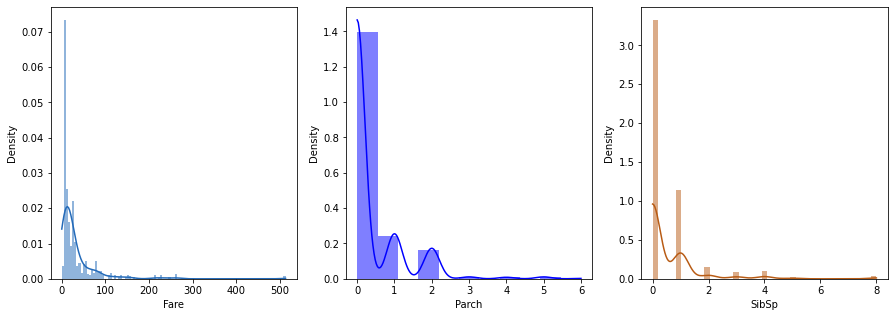

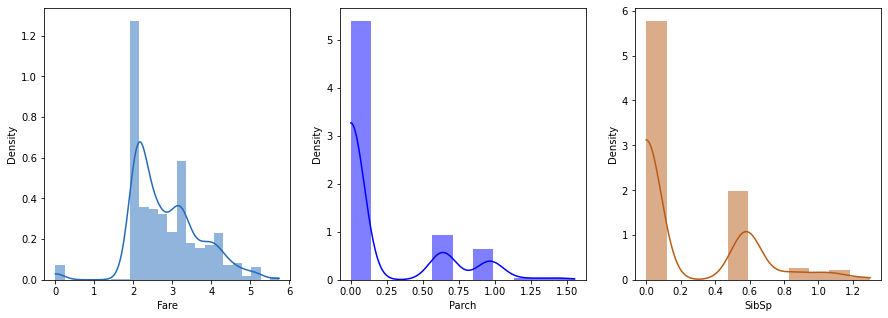

In [34]:
fig, (ax_positive, ax_target, ax_negative) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data_modelling['Fare'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(data_modelling['Parch'],kde=True, stat='density', linewidth=0, color = 'blue', ax=ax_target)
sns.histplot(data_modelling['SibSp'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)
plt.show()

data_modelling = NormalizeSkewedFeatures(data_modelling)

fig, (ax_positive, ax_target, ax_negative) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data_modelling['Fare'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(data_modelling['Parch'],kde=True, stat='density', linewidth=0, color = 'blue', ax=ax_target)
sns.histplot(data_modelling['SibSp'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)
plt.show()

In [35]:
data_modelling = FeatureEncoding(data_modelling)
display(data_modelling.head())
print(data_modelling.shape)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)","Name_Andreasson, Mr. Paul Edvin","Name_Andrew, Mr. Edgardo Samuel","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Arnold-Franchi, Mr. Josef","Name_Arnold-Franchi, Mrs. Josef (Josefine Franchi)","Name_Artagaveytia, Mr. Ramon","Name_Asim, Mr. Adola","Name_Asplund, Master. Clarence Gustaf Hugo","Name_Asplund, Master. Edvin Rojj Felix","Name_Asplund, Miss. Lillian Gertrud",...,Ticket_SC/PARIS 2167,Ticket_SC/Paris 2123,Ticket_SC/Paris 2163,Ticket_SCO/W 1585,Ticket_SO/C 14885,Ticket_SOTON/O.Q. 3101305,Ticket_SOTON/O.Q. 3101306,Ticket_SOTON/O.Q. 3101307,Ticket_SOTON/O.Q. 3101310,Ticket_SOTON/O.Q. 3101311,Ticket_SOTON/O.Q. 3101312,Ticket_SOTON/O.Q. 392078,Ticket_SOTON/O.Q. 392087,Ticket_SOTON/O2 3101272,Ticket_SOTON/O2 3101287,Ticket_SOTON/OQ 3101316,Ticket_SOTON/OQ 3101317,Ticket_SOTON/OQ 392076,Ticket_SOTON/OQ 392082,Ticket_SOTON/OQ 392086,Ticket_SOTON/OQ 392089,Ticket_SOTON/OQ 392090,Ticket_STON/O 2. 3101269,Ticket_STON/O 2. 3101273,Ticket_STON/O 2. 3101274,Ticket_STON/O 2. 3101275,Ticket_STON/O 2. 3101280,Ticket_STON/O 2. 3101285,Ticket_STON/O 2. 3101286,Ticket_STON/O 2. 3101288,Ticket_STON/O 2. 3101289,Ticket_STON/O 2. 3101292,Ticket_STON/O 2. 3101293,Ticket_STON/O 2. 3101294,Ticket_STON/O2. 3101271,Ticket_STON/O2. 3101279,Ticket_STON/O2. 3101282,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,1.0,0.0,5.602496,22.0,0.580385,0.0,2.050402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,1.0,1.321015,38.0,0.580385,0.0,4.039238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,1.0,5.602496,26.0,0.000000,0.0,2.124550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4.0,1.0,1.321015,35.0,0.580385,0.0,3.780503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5.0,0.0,5.602496,35.0,0.000000,0.0,2.137647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

(891, 1580)


In [36]:
X_train, X_test, y_train, y_test = DataSplitTrainTest(data_modelling)
acc_mice = random_forest(X_train, X_test, y_train, y_test)
acc_mice

Train Data (623, 1579)
Test Data (268, 1579)


0.7798507462686567

In [37]:
print("Listwise Deletion: ", acc_lwd)
print("Mean/Mode Imputation: ", acc_mm)
print("XGBoosting: ", acc_xgboost)
print("MICE: ", acc_mice)

Listwise Deletion:  0.8598130841121495
Mean/Mode Imputation:  0.7798507462686567
XGBoosting:  0.7798507462686567
MICE:  0.7798507462686567
